[Indice](index.ipynb) | Previo: [Problema2Cuerpos](07.00.00.00.Problema2Cuerpos.ipynb) | Siguiente: [Problema2Cuerpos.ProblemaRelativo](07.02.00.00.Problema2Cuerpos.ProblemaRelativo.ipynb)

## 7.1. Motivación
<a id='doscuerpos_motivación'></a>

Los sistemas físicos de los ejemplos estudiados en el [Capítulo *El problema de los N cuerpos*](06.00.00.00.ProblemaNCuerpos.ipynb#problema_ncuerpos) exhiben una dinámica compleja y relativamente impredecible, tal y como lo evidencian las trayectorias de sus partículas en las Figuras Figura ([code:ncuerpos_ejemplo1](#fig:code:ncuerpos_ejemplo1)) y Figura ([code:ncuerpos_ejemplo2](#fig:code:ncuerpos_ejemplo2)).  Más allá de lo que pudimos aprender sobre esos sistemas estudiando sus constantes de movimiento o las propiedades estadísticas a largo plazo (teorema del virial), es poco lo que podemos hacer, analítica e incluso estadísticamente, para predecir su comportamiento.

Hay dos factores, sin embargo, que confabulan en esos dos casos en contra de la posibilidad de una descripción analítica exacta o aproximada de ambos sistemas.  El primero, es que la masa y distancia inicial de sus componentes es similar: la masa de cada partícula no difiera de la de las demás en un factor mayor a unos cuantos y las distancias entre ellas son casi iguales.  Esta características, si bien muy útil para ilustrar los conceptos del capítulo anterior, es realmente poco común en sistemas reales.  En la naturaleza, los cuerpos interactuantes en sistemas de muchas partículas, normalmente y por razones de su formación, tienen masas muy diferentes y distancias a menudo enormemente distintas unas de otras.  

La segunda, fue la generación totalmente aleatoria y pareja de las condiciones iniciales, al menos en el caso del ejemplo de la [Sección *Constantes de movimiento y teorema del virial*](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ConstantesMovimiento.ipynb#ncuerpos_numerico_constantes_virial).  Si bien factores aleatorios determinan las propiedades de sistemas astronómicos reales, las posiciones y velocidades de las componentes de estos sistemas normalmente guardan relaciones que emergen también de sus procesos de formación.

Consideremos entonces un sistema en el que las relaciones entre las masas y las distancias sean menos parejas, más cercanas a lo que podríamos encontrar en la naturaleza:

In [20]:
sistema=[
    dict(
        m=10.0,
        r=[1,0,0],
        v=[0,1,0.5]),
    dict(
        m=1.0,
        r=[1.5,0,0],
        v=[0,-3,1],
    ),
    dict(
        m=0.1,
        r=[-1,0,0],
        v=[0,3,1],
    )
]

Note que las masas de este sistema difieren por un factor de entre 10 y 100 (en la naturaleza los factores pueden ser superiores a 1.000 o 10.000). Las distancias entre ellas son también muy diferentes (mientras que las partículas 0 y 1 están a 0.5 unidades, la 0 y la 2 están a 2 unidades, es decir 4 veces más lejos). Adicionalmente, todas las partículas están, en el tiempo inicial, cerca de un mismo plano.

Podemos usar las rutinas desarrolladas en el capítulo anterior para encontrar la evolución de este sistema durante, por ejemplo, 10 unidades de tiempo:

In [22]:
%matplotlib nbagg

<a id='code:ncuerpos_jerarquico1'></a>

<IPython.core.display.Javascript object>


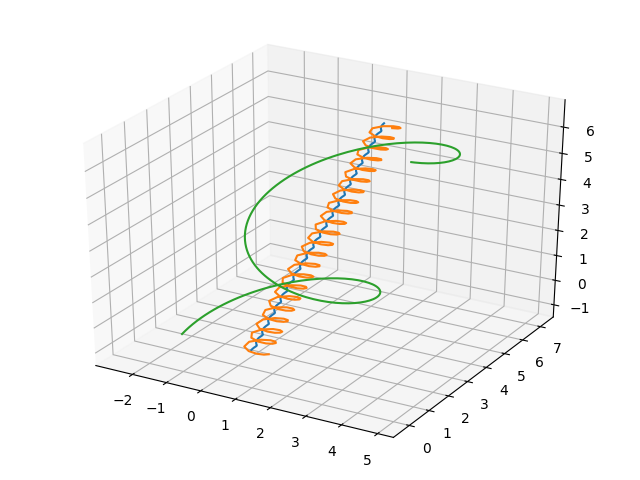

In [23]:
from numpy import linspace

#Solución
from pymcel.export import ncuerpos_solucion 
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,
                                           linspace(0.0,10.0,200))

#Gráfica en el sistema de referencia inercial original
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rs,vs)

<a id='code:ncuerpos_jerarquico1'></a><center><b>Figura 7.74.</b> </center>

Si bien la trayectoria de las partículas de este sistema es mucho más predecible que las de los sistemas en el capítulo anterior, en el sistema de referencia original en el que se describieron las condiciones iniciales, el movimiento sigue siendo relativamente complejo.  

Si nos pasamos al sistema de referencia del centro de masa, descubrimos el secreto que motiva esta sección:

<a id='code:ncuerpos_jerarquico1_CM'></a>

<IPython.core.display.Javascript object>


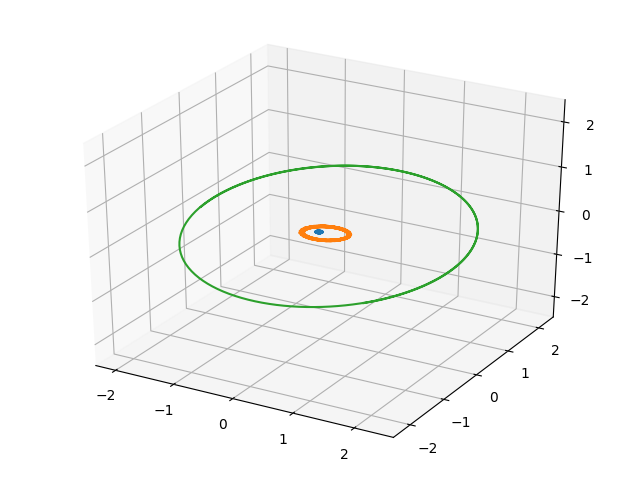

In [24]:
#Gráfica en el sistema de referencia del centro de masa
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rps,vps);

<a id='code:ncuerpos_jerarquico1_CM'></a><center><b>Figura 7.75.</b> </center>

La trayectoria de todas las partículas parece ahora bastante predecible.  La partícula 0 esta cerca al centro de masa (aunque tiene un movimiento de baja amplitud.)  La partícula 1, forma con la primera un sistema de dos cuerpos perfectamente reconocible, mientras que la partícula 2 parece orbitar a las primeras dos más masivas, como si fueran una solar, aunque en un plano diferente de la trayectoria que ellas describen entre sí.  

En conclusión, a pesar de tratarse en estricto de un sistema de 3 cuerpos, en realidad podemos describirlo como dos sistemas anidados de dos cuerpos: (1) el sistema formado por la partícula 0 y 1 y (2) el sistema formado por este par (como si fuera una sola partícula) y la partícula 2.  

Muchos de los sistemas que encontramos en la naturaleza son como este.  Los llamamos **sistemas jerarquicos de N cuerpos**.

> **Definición 10.12. Sistemas jerarquicos de N cuerpos.**<a id=''></a> Un sistema de N cuerpos se considera jerarquico si su movimiento puede describirse como la combinación o superposición de $N-1$ sistemas de dos cuerpos.  

> Los sistemas jerarquicos de N cuerpos pueden clasificarse en cuatro tipos (ver Figura ([sistemas_jerarquicos](#fig:sistemas_jerarquicos))):

> - **Sistemas centrales**: En estos sistemas, normalmente dominados por un cuerpo muy masivo, las partículas orbitan un centro de masa común (baricentro) siguiendo trayectorias que puedem describirse como la de un sistema de dos cuerpos con la masa de cada partícula y la masa del cuerpo central.  El cuerpo central puede considerarse en reposo.  El Sistema Solar es un sistema de este tipo. 

> - **Sistemas anidados**: En estos sistemas, las partículas se organizan de forma anidada: una partícula órbita a un par de sistemas que a su vez son pares de sistemas y así sucesivamente.  El ejemplo de esta sección es un sistema jerarquico anidado.

> - **Sistemas múltiples**: En estos sistemas las partículas se agrupan por pares, cuyos centro de masa se orbitan mutuamente como si fueran a su vez sistemas de dos cuerpos.  Un sistema cuadruple de estrellas formados por dos sistemas binarios que se orbitan mutuamente forman un sistema jerarquico multiple.

> - **Sistemas mixtos**: Son sistemas jerarquicos que combinan dos o varios de los modelos descritos aquí.

<a id='fig:sistemas_jerarquicos'></a>![Tipos de sistemas jerarquicos de N cuerpos.++t!++1.0++\label{fig:sistemas_jerarquicos}](./figures/horizontal_sistemas_jerarquicos.png)

<center><b>Figura 7.76</b>. Tipos de sistemas jerarquicos de N cuerpos.</center>

Resolver el problema de los dos cuerpos no es entonces, simplemente, una manera burda de estudiar sistemas más complejos formados por muchos cuerpos interactuantes.  En sistemas jerárquicos el problema de dos cuerpos, sumado a la teoría de perturbaciones, es la manera en la que normalmente se estudia la dinámica de los sistemas.

[Indice](index.ipynb) | Previo: [Problema2Cuerpos](07.00.00.00.Problema2Cuerpos.ipynb) | Siguiente: [Problema2Cuerpos.ProblemaRelativo](07.02.00.00.Problema2Cuerpos.ProblemaRelativo.ipynb)